# Example Usage of `flipchem` python package

What follows are some basic usage examples of the flipchem package. First we need to import flipchem, but also datetime. Matplotlib is used here for plotting output from flipchem.

In [106]:
%matplotlib inline
from datetime import datetime
import flipchem
import numpy as np
from matplotlib import pyplot
from IPython.display import display, Latex

## Obtaining ion densities for one altitude

Let's get the ion densities at 130 km altitude at the location of the RISR-N incoherent scatter radar:

In [107]:
date = datetime(2017,1,4,2)
fc = flipchem.Flipchem(date)

glat = 74.72955
glon = -94.90576
alt = 130.0
ne = 5.0e11
te = ti = 600.
outputs = fc.get_point(glat,glon,alt,ne,te,ti)
lthrs,sza,dec,Op,O2p,NOp,N2p,Np,NNO,N2D,success = outputs

print('Local Time: %s\tSolar Zenith Angle: %s Solar Declination Angle: %s' % (lthrs,sza,dec))
print('Densities:')
display(Latex('O$^+$: %0.5e m$^{-3}$' % Op))
display(Latex('O$_2^+$: %0.5e m$^{-3}$' % O2p))
display(Latex('NO$^+$: %0.5e m$^{-3}$' % NOp))
display(Latex('N$_2^+$: %0.5e m$^{-3}$' % N2p))
display(Latex('N$^+$: %0.5e m$^{-3}$' % Np))

Local Time: 19.588119506835938	Solar Zenith Angle: 93.07436627254928 Solar Declination Angle: -22.65814170352014
Densities:


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

## Obtaining ion densities profiles

Now let's get ion densities profiles at the location of the RISR-N incoherent scatter radar:

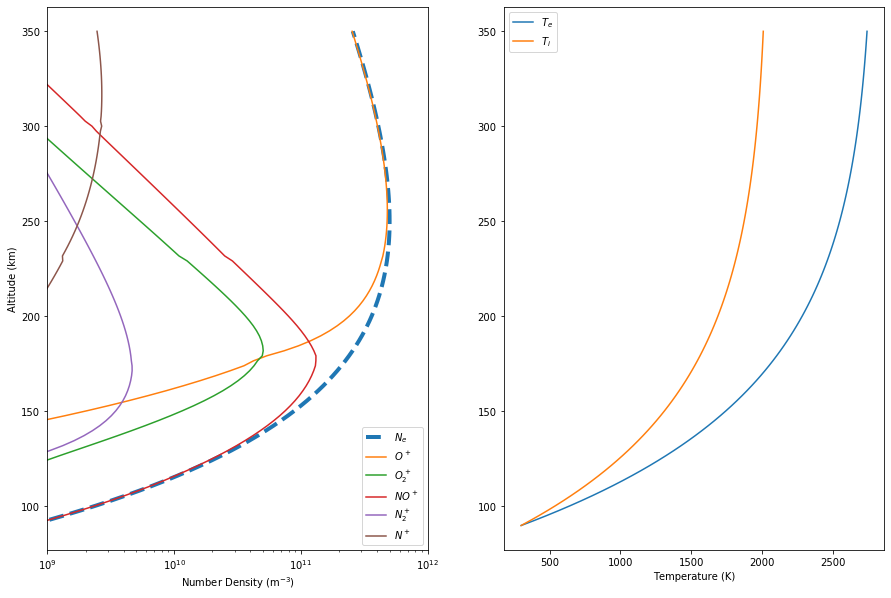

In [112]:
date = datetime(2017,1,4,18)
fc = flipchem.Flipchem(date)

glat = 74.72955
glon = -94.90576
alts = np.linspace(90,350,num=100)
nes = 5.0e11*np.exp(1-(alts-250)/70-np.exp(-(alts-250)/70))
tes = 2500*(1-np.exp(-(alts-90)/70))+300
tis = 1750*(1-np.exp(-(alts-90)/70))+300

Op = np.zeros((alts.shape))
O2p = np.zeros((alts.shape))
NOp = np.zeros((alts.shape))
N2p = np.zeros((alts.shape))
Np = np.zeros((alts.shape))
successes = np.zeros((alts.shape))

for i,(alt,ne,te,ti) in enumerate(zip(alts,nes,tes,tis)):
    outputs = fc.get_point(glat,glon,alt,ne,te,ti)
    Op[i] = outputs[3]
    O2p[i] = outputs[4]
    NOp[i] = outputs[5]
    N2p[i] = outputs[6]
    Np[i] = outputs[7]
    successes[i] = outputs[-1]

fig = pyplot.figure(figsize=(15,10))
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)
ax1.plot(nes,alts,'--',label='$N_e$',lw=4)
ax1.plot(Op,alts,label='$O^+$')
ax1.plot(O2p,alts,label='$O_2^+$')
ax1.plot(NOp,alts,label='$NO^+$')
ax1.plot(N2p,alts,label='$N_2^+$')
ax1.plot(Np,alts,label='$N^+$')
ax1.set_xscale('log')
ax1.set_xlim([1e9,1e12])
ax1.set_ylabel('Altitude (km)')
ax1.set_xlabel('Number Density (m$^{-3}$)')
l = ax1.legend()

ax2.plot(tes,alts,label='$T_e$')
ax2.plot(tis,alts,label='$T_i$')
ax2.set_xlabel('Temperature (K)')
l = ax2.legend()